# Data Analysis and Visualizations for Bias Identification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer 

## Import Data

In [2]:
communities_and_crime = fetch_ucirepo(id=183)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets
y = y.to_numpy().flatten()

X_df = pd.DataFrame(X, columns=communities_and_crime.data.feature_names)

y_df = pd.Series(y, name='ViolentCrimesPerPop')

# Combine X and y into one DataFrame
data = pd.concat([X_df, y_df], axis=1)
print(data.shape)

(1994, 128)


In [3]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


# Handling Missing Values

In [4]:
# Handling missing values (initial count of missing values)
data = data.apply(pd.to_numeric, errors='coerce')
missing_values = data.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Calculate percentage of missing values per column
missing_percentage = (missing_values / len(data)) * 100
threshold = 50  # Remove columns with more than 50% missing values
removed_features = missing_percentage[missing_percentage > threshold].index.tolist()

# Drop columns with more than 50% missing values
data = data.drop(columns=removed_features)
print("Removed Features:\n", removed_features)

# Impute missing values using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=data.columns)

Missing Values per Column:
 state                     0
county                 1174
community              1177
communityname          1994
fold                      0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 128, dtype: int64
Removed Features:
 ['county', 'community', 'communityname', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']


In [5]:
data = data.drop(columns=["fold"], axis=1)
data.head()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


# Correlation Analysis

### Finding highly correlated features

In [6]:
correlation_matrix = data.corr()

# Set a threshold for high correlation (adjust as needed)
threshold = 0.8

# Find pairs of features with correlation above the threshold
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > threshold:  #Consider both positive and negative correlations
            highly_correlated_pairs.append((col1, col2, correlation))

# Sort the highly correlated pairs by correlation strength
highly_correlated_pairs.sort(key=lambda x: abs(x[2]), reverse=True) #Sort by absolute value

# Print the highly correlated feature pairs
print("\nHighly correlated feature pairs (correlation > 0.8):")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")


Highly correlated feature pairs (correlation > 0.8):
PctRecImmig8 and PctRecImmig10: 1.00
OwnOccLowQuart and OwnOccMedVal: 0.99
PctRecImmig5 and PctRecImmig8: 0.99
population and numbUrban: 0.99
OwnOccMedVal and OwnOccHiQuart: 0.99
PctRecentImmig and PctRecImmig5: 0.99
RentMedian and MedRent: 0.99
PctRecImmig5 and PctRecImmig10: 0.99
PctFam2Par and PctKids2Par: 0.99
PctLargHouseFam and PctLargHouseOccup: 0.98
FemalePctDiv and TotalPctDiv: 0.98
PctPersOwnOccup and PctHousOwnOcc: 0.98
RentMedian and RentHighQ: 0.98
PctRecentImmig and PctRecImmig8: 0.98
medIncome and medFamInc: 0.98
RentHighQ and MedRent: 0.98
OwnOccLowQuart and OwnOccHiQuart: 0.98
MalePctDivorce and TotalPctDiv: 0.98
perCapInc and whitePerCap: 0.97
PctRecentImmig and PctRecImmig10: 0.97
RentLowQ and RentMedian: 0.96
PctRecImmig10 and PctForeignBorn: 0.96
PctBSorMore and PctOccupMgmtProf: 0.95
RentLowQ and MedRent: 0.95
population and NumUnderPov: 0.95
PctRecImmig8 and PctForeignBorn: 0.95
PctLess9thGrade and PctNotHSGra

### Finding features highly correlated with 'ViolentCrimesPerPop'


Features highly correlated with ViolentCrimesPerPop (|correlation| > 0.5):
PctIlleg: 0.74
racepctblack: 0.63
pctWPubAsst: 0.57
FemalePctDiv: 0.56
TotalPctDiv: 0.55
MalePctDivorce: 0.53
PctPopUnderPov: 0.52
PctUnemployed: 0.50
PctPersOwnOccup: -0.53
pctWInvInc: -0.58
PctTeen2Par: -0.66
PctYoungKids2Par: -0.67
racePctWhite: -0.68
PctFam2Par: -0.71
PctKids2Par: -0.74


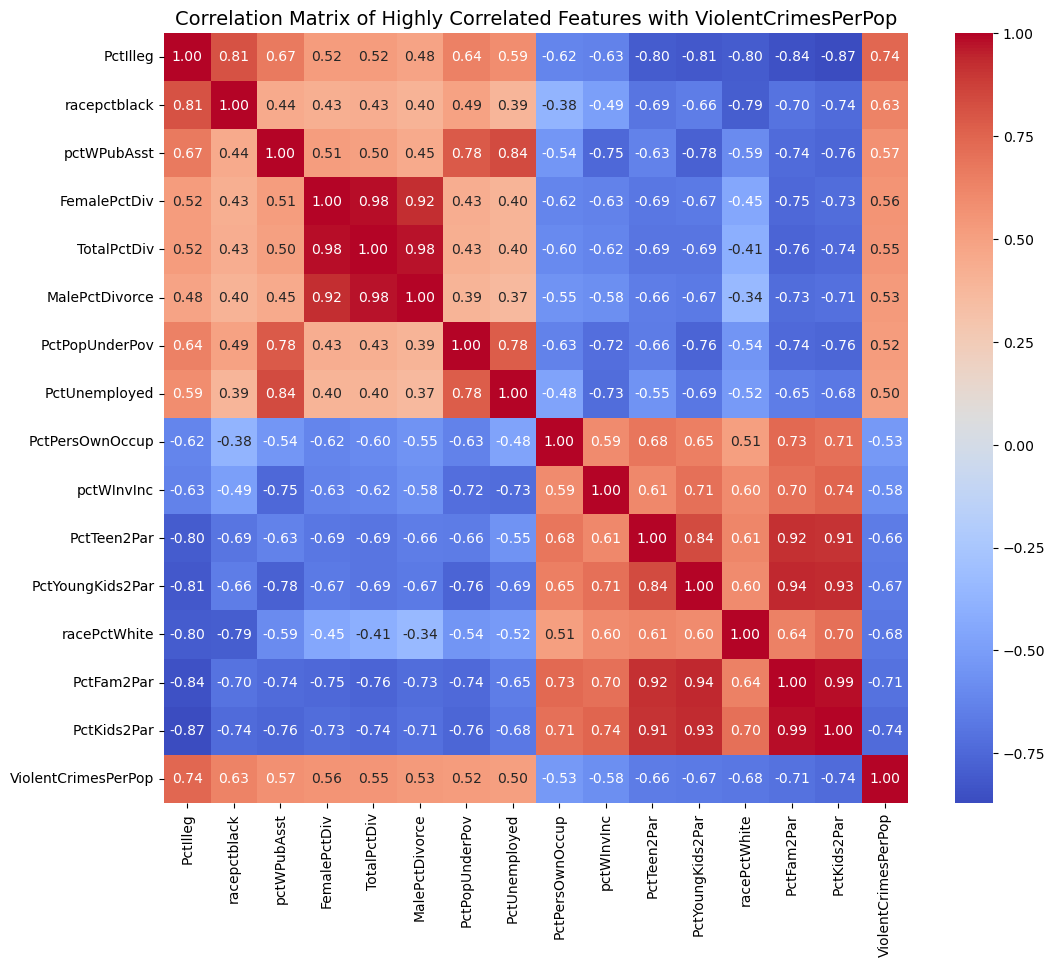

In [7]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the correlation threshold
threshold = 0.5

# Get features highly correlated with 'ViolentCrimesPerPop'
correlations_with_violentcrime = correlation_matrix['ViolentCrimesPerPop'].drop('ViolentCrimesPerPop')
highly_correlated_features = correlations_with_violentcrime[correlations_with_violentcrime.abs() > threshold].sort_values(ascending=False)

# Print highly correlated features and their correlation coefficients
print("\nFeatures highly correlated with ViolentCrimesPerPop (|correlation| > 0.5):")
for feature, correlation in highly_correlated_features.items():
    print(f"{feature}: {correlation:.2f}")

# Create a subset DataFrame and plot correlation matrix only if there are highly correlated features.
if not highly_correlated_features.empty:
  highly_correlated_features = highly_correlated_features.index.tolist()
  highly_correlated_features.append('ViolentCrimesPerPop')
  subset_data = data[highly_correlated_features]
  correlation_matrix_subset = subset_data.corr()

  plt.figure(figsize=(12, 10))
  sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix of Highly Correlated Features with ViolentCrimesPerPop', fontsize=14)
  plt.show()
else:
  print("\nNo features found with correlation greater than the threshold.")

# Analysing Racial Features

There are 4 columns for races. These are analysed to understand any racial bias in the dataset

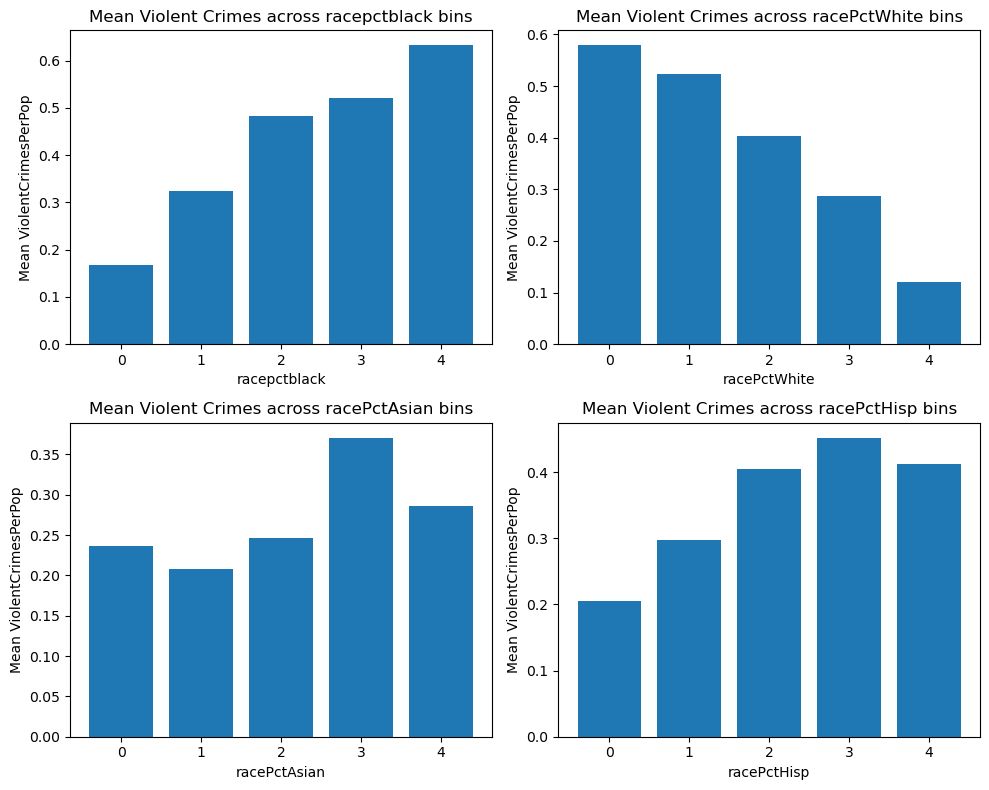

In [8]:
race_cols = ['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp']

plt.figure(figsize=(10, 8))

for i, col in enumerate(race_cols):
    plt.subplot(2, 2, i + 1)
    data[col] = pd.cut(data[col], bins=np.linspace(0, 1, 6), labels=False)
    mean_crime = data.groupby(col)['ViolentCrimesPerPop'].mean()
    
    plt.bar(mean_crime.index, mean_crime.values)
    plt.title(f'Mean Violent Crimes across {col} bins')
    plt.xlabel(col)
    plt.ylabel('Mean ViolentCrimesPerPop')

plt.tight_layout()
plt.show()

From the bar charts, we can notice that for different races, the distribution of violent crimes varies. For 'racePCTWhite', the number of violent crimes are shown low. The concentration of crimes are mainly in the lowest bar. While for 'racepctblack', it is very high in the last bar indicating that they commit very violent crimes. For 'racePctasian' and 'racePctHisp', it is highest in the 4th bars. However, there are more crimes in all the bars for 'racepctBlack', 'racePctAsian', and 'racePcthisp' compared to 'racePctwhite'. 

This difference could be because the population of white people are more compared to the other races. Let's analyse that and find out. 

To do this, the races are grouped by the 'state' and the mean value is taken to plot the graphs.

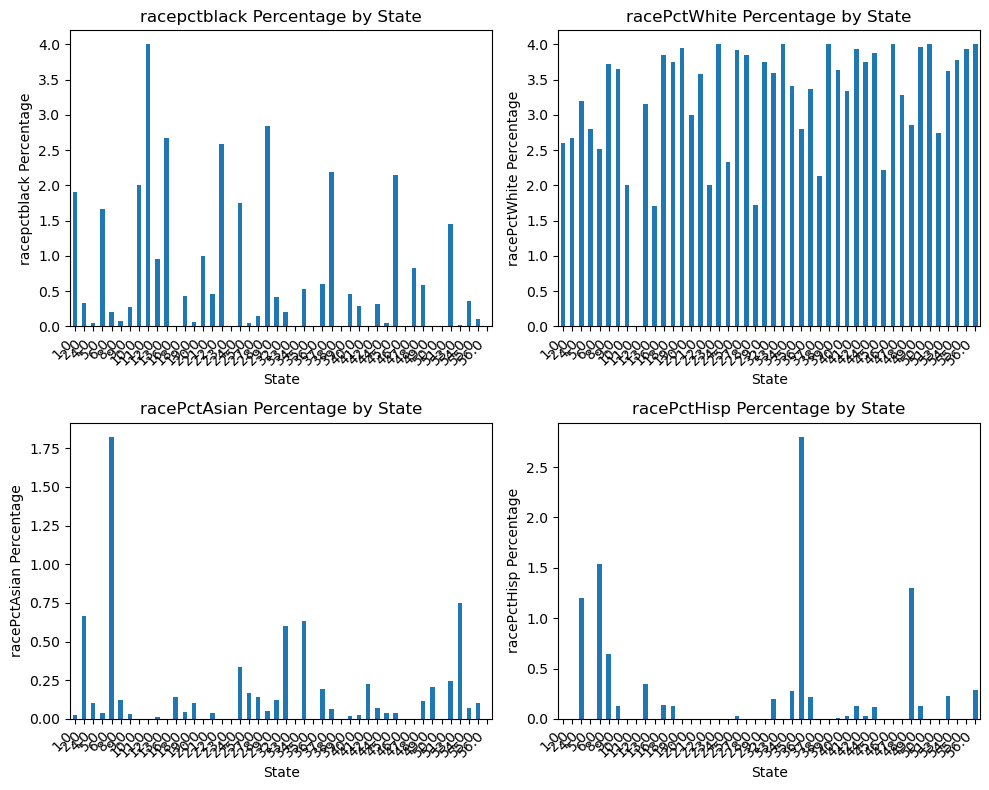

In [9]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(race_cols):
    plt.subplot(2, 2, i + 1) 
    
    grouped_data = data.groupby('state')[col].mean()
    grouped_data.plot(kind='bar')
    
    plt.title(f'{col} Percentage by State')
    plt.xlabel('State')
    plt.ylabel(f'{col} Percentage')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Clearly, The percentage of white population is higher than the others in most states. From this, we can infer that the data has sample size issues and selection biases.

There isn't enough data to represent different racial communities.

We can also notice that there are geographical bias too in this. Due to the lower population of 'racepctblack','racePctAsian', 'racePctHisp'in most cities, the crime committed by them are highlighted in the model.

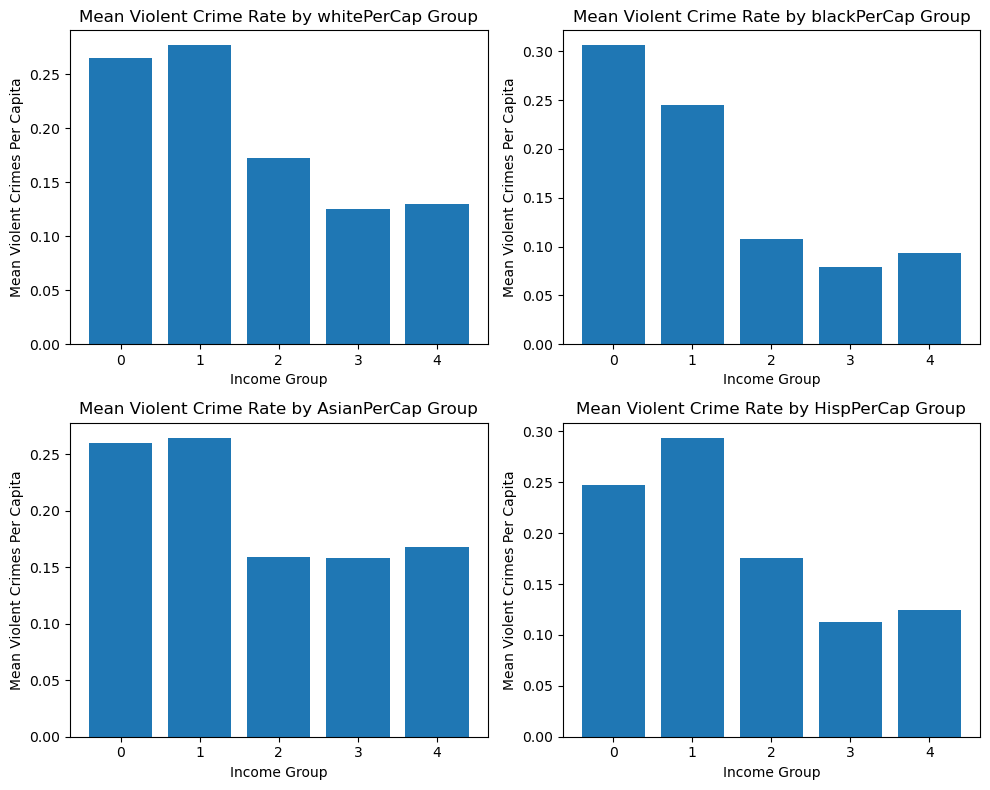

In [10]:
income_cols = ['whitePerCap', 'blackPerCap', 'AsianPerCap', 'HispPerCap']

plt.figure(figsize=(10, 8)) 
for i, col in enumerate(income_cols):
    plt.subplot(2,2, i+1)
    num_bins = 5 
    data[f'{col}_group'] = pd.cut(data[col], bins=np.linspace(data[col].min(), data[col].max(), num_bins + 1), labels=False, include_lowest=True)
    mean_crime_by_income = data.groupby(f'{col}_group')['ViolentCrimesPerPop'].mean()
    
    plt.bar(mean_crime_by_income.index, mean_crime_by_income.values)
    plt.xlabel('Income Group')
    plt.ylabel('Mean Violent Crimes Per Capita')
    plt.title(f'Mean Violent Crime Rate by {col} Group')
    plt.xticks(mean_crime_by_income.index)

plt.tight_layout()
plt.show()

As Income increases, the crime rate decreases which shows poverty or lack of employment is a factor for rise in crime rates. 

Considering the history of Black people in US, the initial slavery and racial bias in the society is also a reason for the higher crime rate among the african americans. Even though the slavery ended way back, the societal bias still exists to some extend. This results in the lack of opportunities and poverty in their communities leading to the higher crime rates. 

The dataset supports this hypothesis. It aligns with what's expected and confirms a preexisting belief. Thus we can say that the dataset also has optimist bias.



# Analysing Age Features

<Figure size 800x500 with 0 Axes>

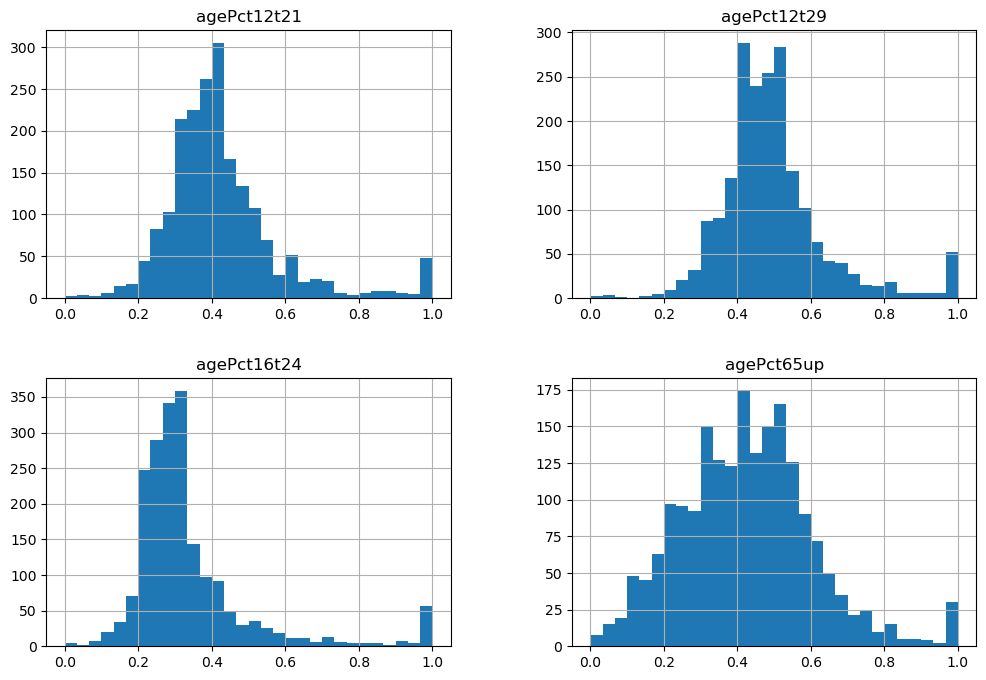

In [11]:
age_columns = ['agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up']
plt.figure(figsize=(8, 5))
data[age_columns].hist(bins=30, figsize=(12, 8))
plt.show()

Analysing the distribution of young and old people in different states

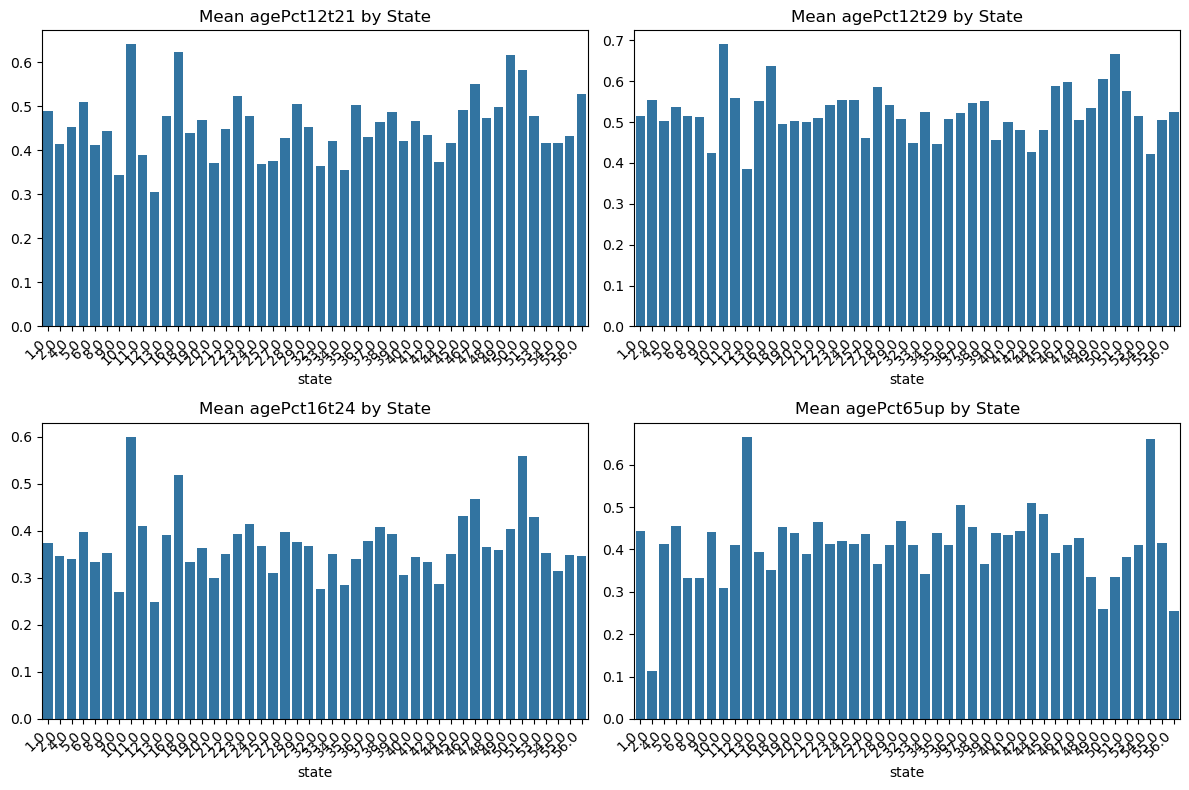

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(age_columns):
    plt.subplot(2, 2, i + 1)
    state_means = data.groupby('state')[col].mean()
    sns.barplot(x=state_means.index, y=state_means.values) #Seaborn barplot
    plt.title(f'Mean {col} by State')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There is a higher population of younger people compared to older people. Especially in the age12to29, you can see an increase which means there are more people in the mid 20s. However, in some states, it is the opposite. The population of older people are a bit spread across the graph. This shows the data isn't evenly distributed for all the age categories. This can result in sample issues.

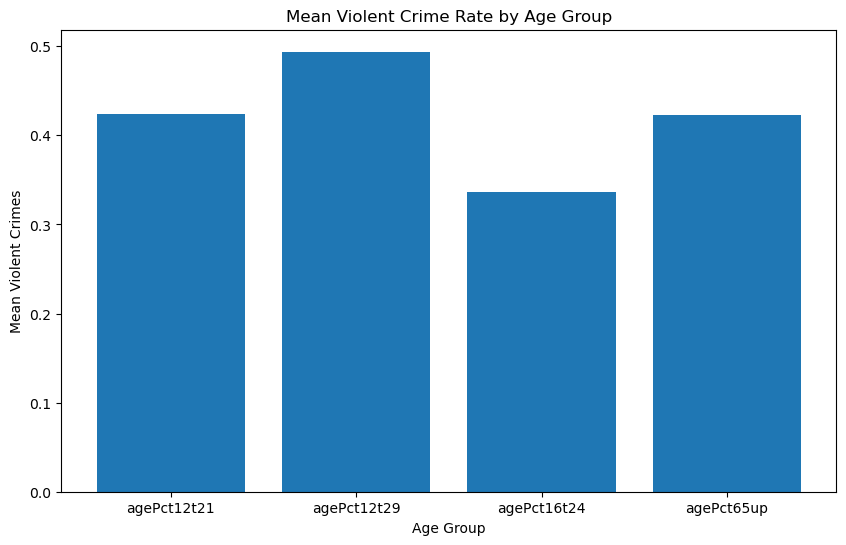

In [13]:
mean_crime_by_age = data[age_columns].mean()

plt.figure(figsize=(10, 6))
plt.bar(age_columns, mean_crime_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Mean Violent Crimes')
plt.title('Mean Violent Crime Rate by Age Group')
plt.show()

Here, the age groups for young people are overlapping and causing confusions. So, we cannot really infer a clear conclusion from this.
Let's analyse further by grouping young and old ones separately.

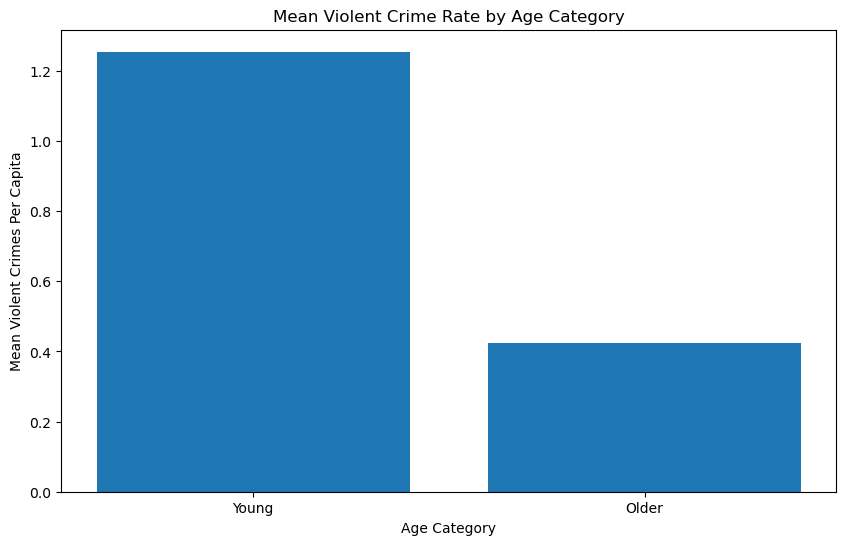

In [14]:
age_categories = {
    'Young': ['agePct12t21', 'agePct12t29', 'agePct16t24'],
    'Older': ['agePct65up']
}

# Calculate the total percentage for each age category
data['Young'] = data[age_categories['Young']].sum(axis=1)
data['Older'] = data[age_categories['Older']].sum(axis=1)

# Calculate the mean crime rate for each age category
mean_crime_by_age_category = data[['Young', 'Older']].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_crime_by_age_category.index, mean_crime_by_age_category.values)
plt.xlabel('Age Category')
plt.ylabel('Mean Violent Crimes Per Capita')
plt.title('Mean Violent Crime Rate by Age Category')
plt.show()

Even though there is some overlapping, the bar for young people are really high. Therefore, we can say that they commit more crimes that old people.
This is possibly due to unemployment and other factors like family and kids. 
let's look at the employment of young people to understand the reasons behind this. 

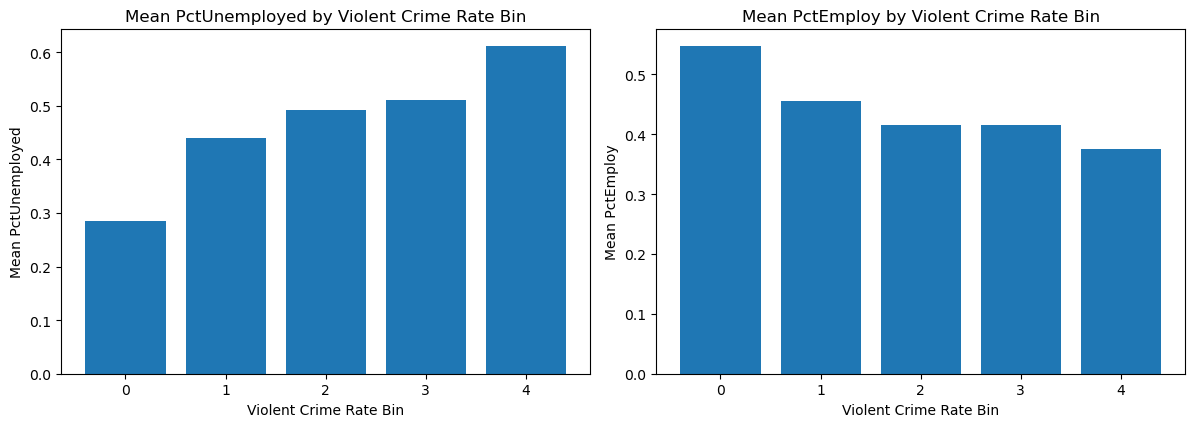

In [15]:
edu_emp_cols = ['PctUnemployed', 'PctEmploy']

# Create bins for your crime rate variable. Adjust the number of bins and bin edges as needed.
num_bins = 5
data['crime_bins'] = pd.cut(data['ViolentCrimesPerPop'], bins=np.linspace(data['ViolentCrimesPerPop'].min(), data['ViolentCrimesPerPop'].max(), num_bins + 1), labels=False)

plt.figure(figsize=(18, 12))

for i, col in enumerate(edu_emp_cols):
    plt.subplot(3, 3, i + 1)
    # Group data by crime bins and calculate the mean for the education/employment variable.
    mean_edu_emp_by_crime = data.groupby('crime_bins')[col].mean()
    # Create the bar chart.
    plt.bar(mean_edu_emp_by_crime.index, mean_edu_emp_by_crime.values)
    plt.xlabel('Violent Crime Rate Bin')
    plt.ylabel(f'Mean {col}')
    plt.title(f'Mean {col} by Violent Crime Rate Bin')

plt.tight_layout()
plt.show()

Clearly, with increase in the percentage of unemployed, the crime rate increases. The result is as expected confirming an expected hypothesis. There by we can say that even in the case of age, the dataset is optimist biased.

## Analysing The Effect Of Family Structure On Crime Rate

In the correlation analysis, there is a strong correlation between 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv' with 'ViolentCrimesPerPop. Let's analyse to make sure it's right. Also, this could be another factor that increases crime rates in young people.

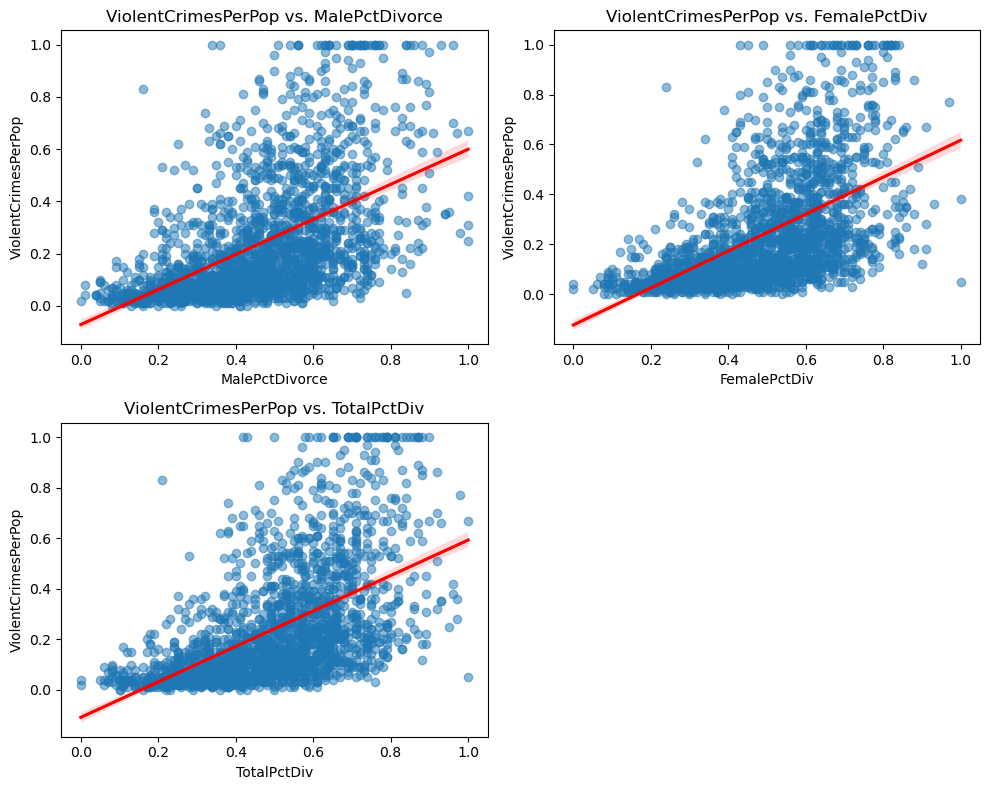

In [16]:
divorce_cols = ['MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv']

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

for i, col in enumerate(divorce_cols):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=col, y='ViolentCrimesPerPop', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}) #Seaborn regplot
    plt.title(f'ViolentCrimesPerPop vs. {col}')
    plt.xlabel(col)
    plt.ylabel('ViolentCrimesPerPop')

plt.tight_layout()
plt.show()

All three plots show a positive correlation. As the percentage of divorced males, females, or the total population increases, the violent crime rate per capita also tends to increase.

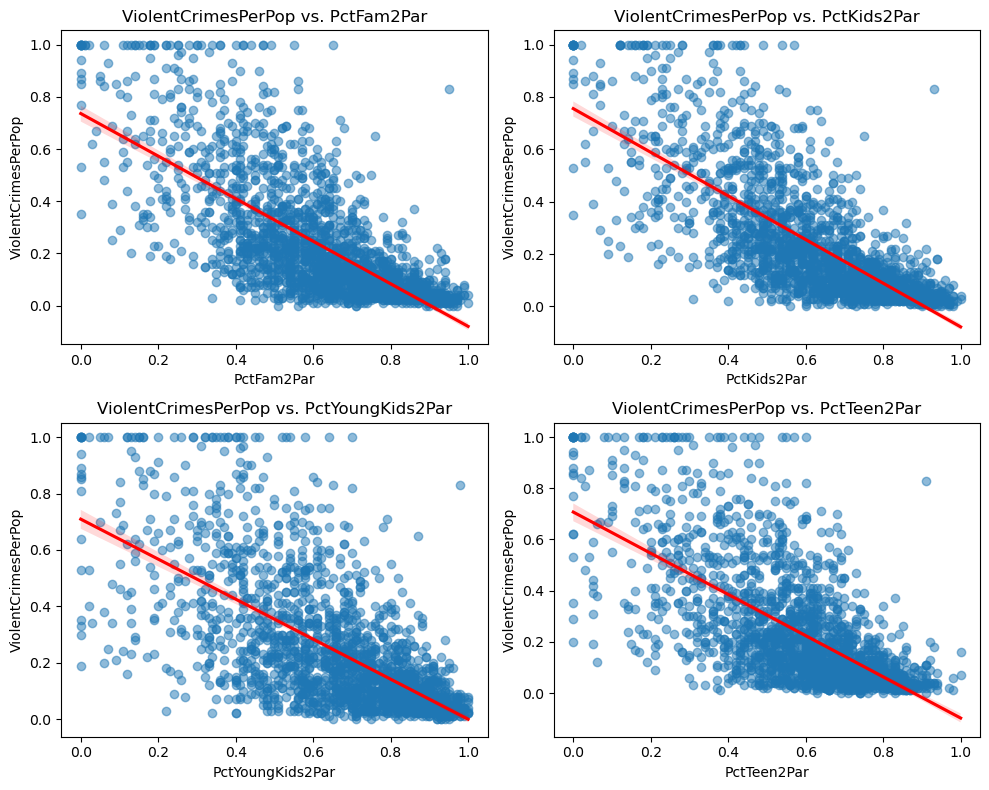

In [17]:
family_struct_cols = ['PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par']

plt.figure(figsize=(10, 8))  # Adjust figure size as needed

for i, col in enumerate(family_struct_cols):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=col, y='ViolentCrimesPerPop', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'ViolentCrimesPerPop vs. {col}')
    plt.xlabel(col)
    plt.ylabel('ViolentCrimesPerPop')

plt.tight_layout()
plt.show()

The plots are showing a very high negative correlation which means parents (both parents present) who have young and teens kids, the crime rate is low.
Both positive and negative correlations are important and should be considered when analyzing the relationship between variables. Understanding factors that increase or decrease crime are important.

# Biases Identified In The Dataset
* Selection bias: The dataset is not representative of the population.
* Sample size issues: Some population samples are too small to draw reliable conclusions.
* Geographical bias: It tends to show high crime rates in areas where there are more people from black, hispanic or asian origin.
* Optimist bias: The data includes positive examples of a hypothesis reaffirming an existing belief.